In [33]:
# Install necessary libraries (if needed)
!pip install pandas numpy scikit-learn seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (Make sure you've uploaded it)
file_path = "/content/AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head(15)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [34]:
# Check missing values
df.isnull().sum()

# Fill missing values
df['reviews_per_month'].fillna(0, inplace=True)  # Replace NaNs with 0
df.drop(columns=['name', 'host_name', 'last_review'], inplace=True)  # Drop unnecessary columns
df.dropna(inplace=True)  # Remove any remaining NaN values

# Show cleaned data
df.head(15)


<ipython-input-34-88c0b54c05ae>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)  # Replace NaNs with 0


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


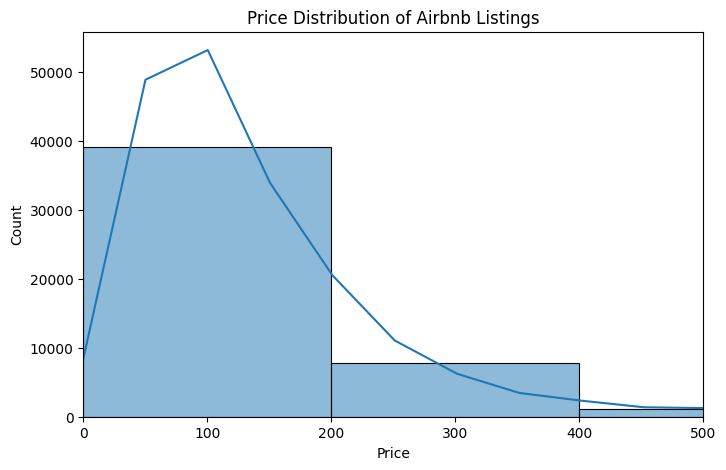

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0, 500)  # Limit price to remove extreme outliers
plt.show(15)


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

# Select relevant features
features = ['neighbourhood_group', 'neighbourhood', 'room_type', 'latitude', 'longitude',
            'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
target = 'price'

# Normalize numerical features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Display processed training data
pd.DataFrame(X_train).head()


,neighbourhood_group,neighbourhood,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
32645,-0.917828,1.554750,-0.924247,-0.241683,-0.067821,-0.196484,-0.275520,-0.138305,-0.186451,-0.849267
23615,0.441222,1.438374,0.909359,2.204698,0.253262,-0.245240,-0.477540,-0.582814,-0.186451,-0.856865
31183,-0.917828,-1.369209,0.909359,-0.715555,-0.158167,-0.245240,-0.522433,-0.682986,-0.156104,-0.856865
29260,-0.917828,-1.369209,-0.924247,-0.819352,0.454751,-0.196484,1.430423,2.391016,-0.186451,1.171688
7275,1.800272,1.642033,0.909359,0.331951,1.224744,-0.098973,-0.230627,-0.526468,-0.186451,-0.856865


In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:")
print(f"MAE: {lr_mae:.2f}, MSE: {lr_mse:.2f}, R2 Score: {lr_r2:.2f}")


Linear Regression Performance:
MAE: 72.04, MSE: 39353.42, R2 Score: 0.11


In [ ]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, R2 Score: {rf_r2:.2f}")


Random Forest Performance:
MAE: 63.44, MSE: 38459.66, R2 Score: 0.13


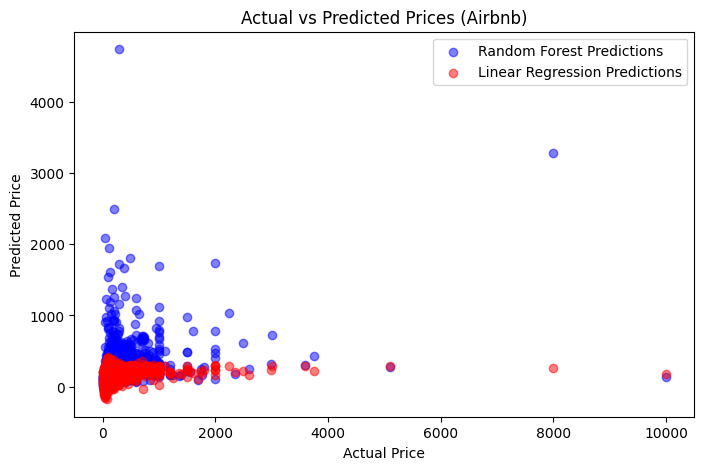

In [37]:
# Compare Predictions with Actual Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", label="Random Forest Predictions")
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="red", label="Linear Regression Predictions")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Airbnb)")
plt.legend()
plt.show(15)


In [ ]:
# Function to safely encode categorical values
def encode_label_value(label_encoder, value):
    if value in label_encoder.classes_:
        return label_encoder.transform([value])[0]
    else:
        return -1  # Assign an unknown category if not found

# Example Airbnb Listing (Brooklyn, Williamsburg, Entire Home)
new_listing = pd.DataFrame({
    'neighbourhood_group': [encode_label_value(label_encoder, 'Manhattan')],
    'neighbourhood': [encode_label_value(label_encoder, 'Queens')],
    'room_type': [encode_label_value(label_encoder, 'Entire home/apt')],
    'latitude': [40.7128],
    'longitude': [-73.9352],
    'minimum_nights': [3],
    'number_of_reviews': [10],
    'reviews_per_month': [0.5],
    'calculated_host_listings_count': [1],
    'availability_365': [180]
})

# Scale numerical features
new_listing_scaled = scaler.transform(new_listing[features])

# Predict price using trained models
predicted_price_rf = rf_model.predict(new_listing_scaled)[0]
predicted_price_lr = lr_model.predict(new_listing_scaled)[0]

print(f"Predicted Price (Random Forest): ${predicted_price_rf:.2f}")
print(f"Predicted Price (Linear Regression): ${predicted_price_lr:.2f}")


Predicted Price (Random Forest): $156.84
Predicted Price (Linear Regression): $170.44


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
